In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [21]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

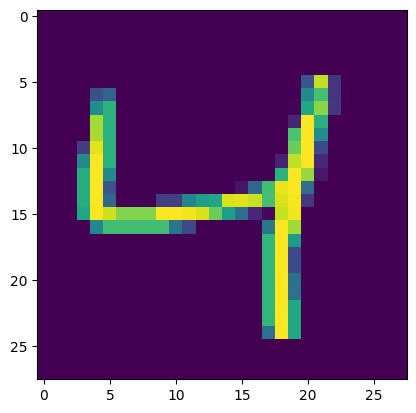

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [25]:
X_train=X_train/255
X_test=X_test/255

In [26]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
training=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8668 - loss: 0.4747 - val_accuracy: 0.9553 - val_loss: 0.1539
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9590 - loss: 0.1413 - val_accuracy: 0.9632 - val_loss: 0.1202
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9736 - loss: 0.0895 - val_accuracy: 0.9703 - val_loss: 0.1006
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9800 - loss: 0.0671 - val_accuracy: 0.9710 - val_loss: 0.0997
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9844 - loss: 0.0513 - val_accuracy: 0.9732 - val_loss: 0.0909
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0375 - val_accuracy: 0.9741 - val_loss: 0.0890
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9914 - loss: 0.0298 - val_accuracy: 0.9757 - val_loss: 0.0866
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9934 - loss: 0.0228

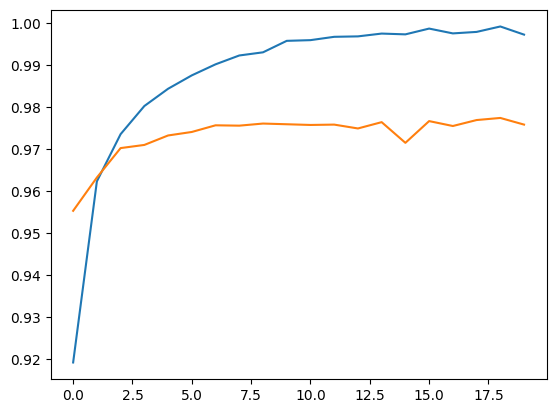

In [30]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'],label='training')
plt.plot(training.history['val_accuracy'],label='validation')

In [31]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
y_pred.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred.argmax(axis=1))

0.9791